# **Training RL Models For Virtual Home Env**

## **1. Prepare environments**
load `src` directory as project root

import neccessary modules

In [2]:
import sys
import os

notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, "../.."))
sys.path.insert(0, project_root)

## **2. Training a Cross Food Gather Agent using PPO**

### **Overview**
In this notebook, we train an agent in a **CrossVirtualHomeGatherFoodEnvV2** environment to collect food and store it in the refrigerator. The training process uses the **PPO (Proximal Policy Optimization)** algorithm from Stable-Baselines3.

### **Training Process**
- We generate **four environment graphs** using `get_basic_environment_graph()`, which define different instances of the **VirtualHome** environment.
- The agent is trained using the **ModelTrainer** class, with **PPO** as the selected reinforcement learning algorithm.
- We perform **hyperparameter tuning** for `vf_coef` (value function coefficient), testing values `[0.1, 0.3, 0.5, 0.7, 0.8, 0.9]`.
- The agent is trained for **80,000 timesteps** using **4 parallel environments** (`vec_envs=4`).

### **Evaluation Metrics**
After training, we analyze:
- **Mean Reward**: Measures how well the agent is performing over time.
- **Value Loss**: Indicates how well the value function is approximating expected rewards.
- **Entropy Loss**: Reflects the agent's exploration level.

### **Code Execution**

```python
from src.training.skill_train import train_cross_food_gather_agent_v1
from pathlib import Path

# Train the agent
trainer1 = train_cross_food_gather_agent_v1()

```python
def train_cross_food_gather_agent_v1() -> ModelTrainer:

    env_graph_list = []
    for i in range(4):
        g = get_basic_environment_graph(virtualhome_exec_path=YOUR_FILE_NAME)
        env_graph_list.append(g)

    trainer = ModelTrainer(
        algo=ModelTrainerRLAlgo.PPO,
        create_env=lambda: CrossVirtualHomeGatherFoodEnvV2(env_graph_list),
    )

    hyperparameter = 'vf_coef'
    hyperparameter_list = [{hyperparameter: i} for i in [0.1, 0.3, 0.5, 0.7, 0.8, 0.9]]
    trainer.train(
        vec_envs=4,
        total_timesteps=80000,
        hyperparameters_list=hyperparameter_list
    )

    trainer.show_mean_reward(hyperparameter)
    trainer.show_value_loss(hyperparameter)
    trainer.show_entropy_loss(hyperparameter)

    return trainer

```

['D:\\programs\\windows_exec.v2.2.4\\VirtualHome.exe', '-batchmode', '-http-port=8080', '-logFile D:\\code\\llm-reinforce-learning\\docs\\train/Player_8080.log']
Getting connection...
CLOSING PROC
['D:\\programs\\windows_exec.v2.2.4\\VirtualHome.exe', '-batchmode', '-http-port=8080', '-logFile D:\\code\\llm-reinforce-learning\\docs\\train/Player_8080.log']
Getting connection...
CLOSING PROC
['D:\\programs\\windows_exec.v2.2.4\\VirtualHome.exe', '-batchmode', '-http-port=8080', '-logFile D:\\code\\llm-reinforce-learning\\docs\\train/Player_8080.log']
Getting connection...
CLOSING PROC
['D:\\programs\\windows_exec.v2.2.4\\VirtualHome.exe', '-batchmode', '-http-port=8080', '-logFile D:\\code\\llm-reinforce-learning\\docs\\train/Player_8080.log']
Getting connection...
CLOSING PROC


100%|█████████████████████████████████████████████████████████████████████████████████| 647168/647168 [10:37<00:00, 1015.27it/s, mean_reward=4076.0, ep_length=10.6, learning_rate=0.0003, value_loss=8.88e+6, entropy_loss=-0.575]


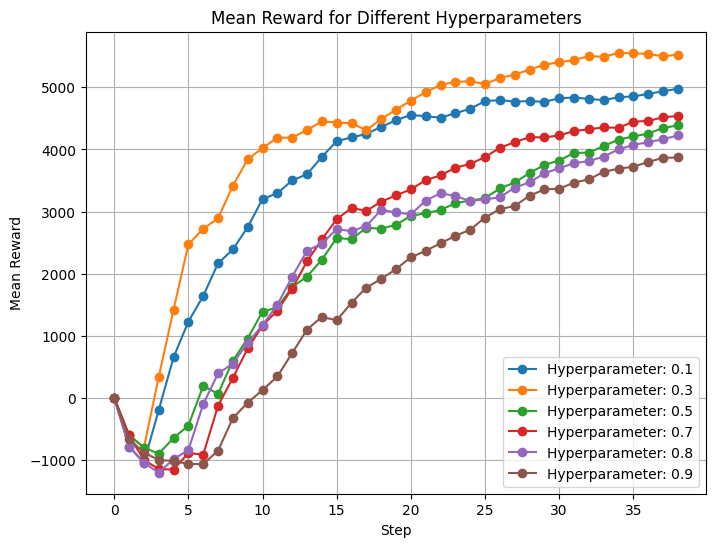

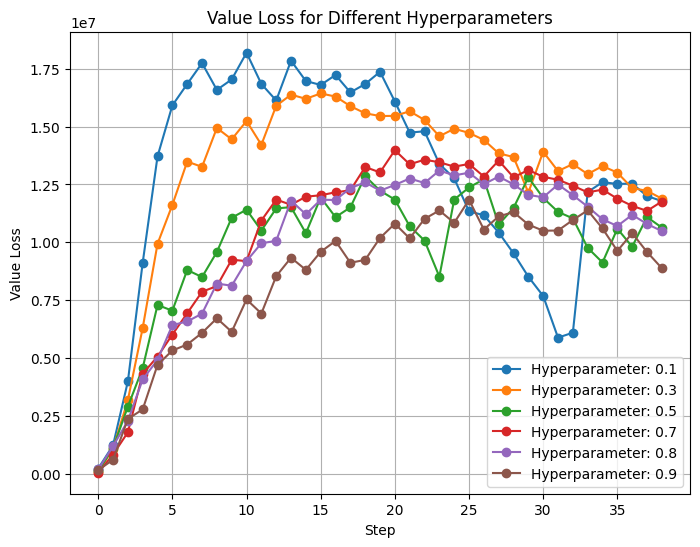

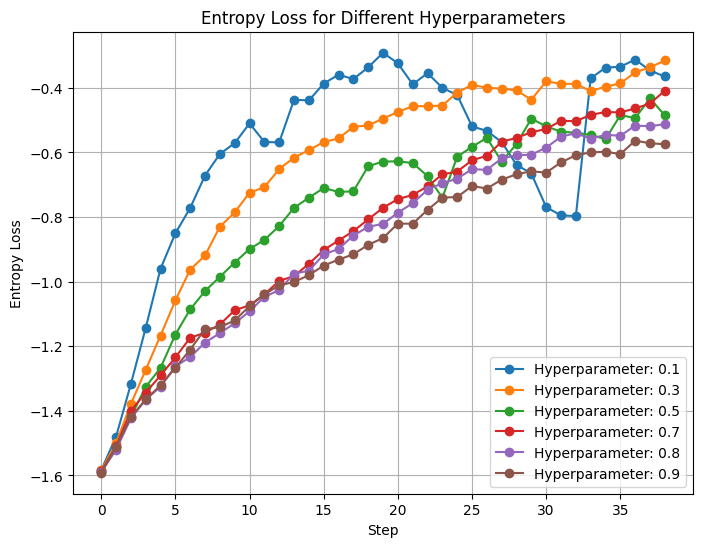

In [2]:
from src.training.skill_train import train_cross_food_gather_agent_v1
from pathlib import Path

trainer1 = train_cross_food_gather_agent_v1()

In [3]:
for i, h in enumerate([0.1, 0.3, 0.5, 0.7, 0.9]):
    trainer1.save_model(i, Path(f'../../model/cross_food_gather_agent_vfcoef{h}.zip'))

## **3. Evaluate Pre-Trained Model Using Evaluator**

In this section, we will evaluate pre-trained models using the `ModelEvaluator`.

### **3.1 Set Up Virtual Environment**
First, we load the Virtual Home executable and generate environment graphs for multiple environments. This allows us to simulate different environments for model evaluation.

### **3.2 Load Pre-Trained Models**
We load multiple PPO models with different hyperparameters (`vf_coef`). Each model has a different value for the value function coefficient, controlling the balance between value function loss and policy loss.

### **3.3 Initialize Model Evaluator**
We initialize the `ModelEvaluator` with the loaded models and environment. This facilitates the evaluation of the models and comparison of their performance in the same environment.

### **3.4 Evaluate Models**
We evaluate the models over a specified number of episodes and steps per episode. The evaluation helps us analyze the models' performance under different conditions.

### **3.5 Visualize Results**
After evaluation, we display the average reward and average episode length for each model. This data helps understand the performance differences between models.


In [3]:
from stable_baselines3.ppo import PPO
from src.vh_util.create_env import get_basic_environment_graph
from src.training import ModelEvaluator
from src.vh_env.cross_env import CrossVirtualHomeGatherFoodEnvV2

def test_model_evaluator():
    YOUR_FILE_NAME = "D:\\programs\\windows_exec.v2.2.4\\VirtualHome.exe"
    env_graph_list = []
    for i in range(6):
        g = get_basic_environment_graph(virtualhome_exec_path=YOUR_FILE_NAME, environment_index=i)
        env_graph_list.append(g)
    env = CrossVirtualHomeGatherFoodEnvV2(env_graph_list)
    
    models = {}
    for vf_coef in [0.1, 0.3, 0.5, 0.7, 0.9]:
        models[f'vfcoef{vf_coef}'] = PPO.load(f'../../model/cross_food_gather_agent_vfcoef{vf_coef}')
    
    model_evaluator = ModelEvaluator(
        models = models,
        env = env,
    )

    model_evaluator.evaluate(
        episode = 4,
        max_steps = 64,
    )

    model_evaluator.show_mean_reward()
    model_evaluator.show_mean_episode_length()
    model_evaluator.show_combined_metrics()


['D:\\programs\\windows_exec.v2.2.4\\VirtualHome.exe', '-batchmode', '-http-port=8080', '-logFile D:\\code\\llm-reinforce-learning\\docs\\train/Player_8080.log']
Getting connection...
CLOSING PROC
['D:\\programs\\windows_exec.v2.2.4\\VirtualHome.exe', '-batchmode', '-http-port=8080', '-logFile D:\\code\\llm-reinforce-learning\\docs\\train/Player_8080.log']
Getting connection...
CLOSING PROC
['D:\\programs\\windows_exec.v2.2.4\\VirtualHome.exe', '-batchmode', '-http-port=8080', '-logFile D:\\code\\llm-reinforce-learning\\docs\\train/Player_8080.log']
Getting connection...
CLOSING PROC
['D:\\programs\\windows_exec.v2.2.4\\VirtualHome.exe', '-batchmode', '-http-port=8080', '-logFile D:\\code\\llm-reinforce-learning\\docs\\train/Player_8080.log']
Getting connection...
CLOSING PROC
['D:\\programs\\windows_exec.v2.2.4\\VirtualHome.exe', '-batchmode', '-http-port=8080', '-logFile D:\\code\\llm-reinforce-learning\\docs\\train/Player_8080.log']
Getting connection...
CLOSING PROC
['D:\\programs\

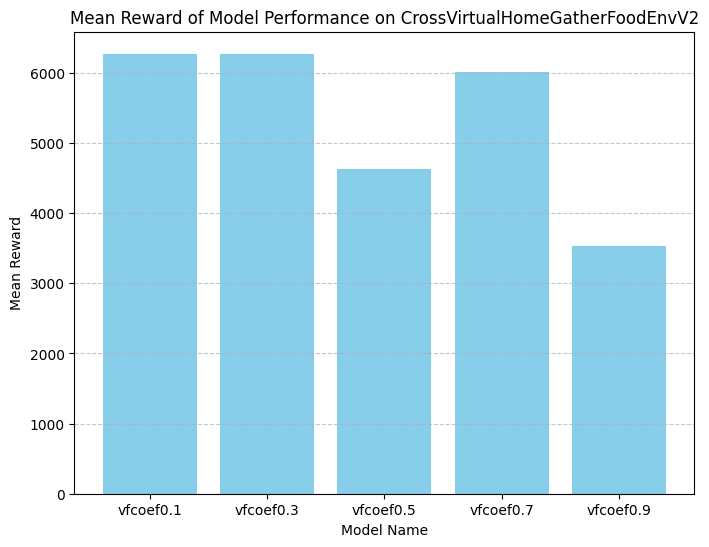

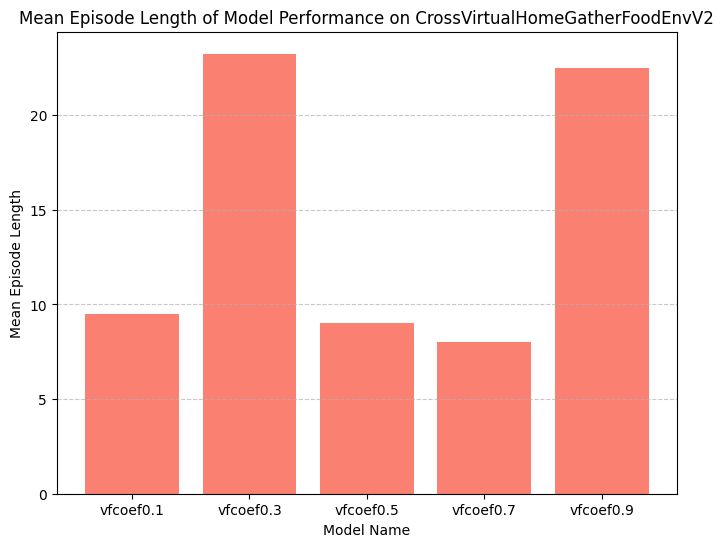

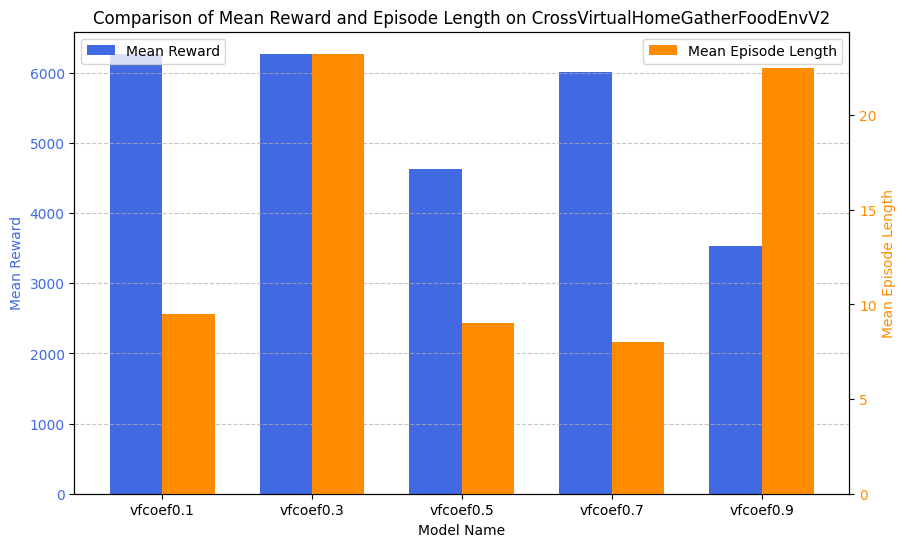

In [4]:
test_model_evaluator()